<a href="https://colab.research.google.com/github/brunoserv/Stanford-solar-forecasting-dataset/blob/main/C%C3%B3pia_de_Ol%C3%A1%2C_este_%C3%A9_o_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

# Carregar o arquivo com dados filtrados para o horário de Brasília
file_path = 'filtered_data_brt.csv'  # Atualize com o caminho correto do arquivo
data = pd.read_csv(file_path)

# Conversão das colunas de data e hora para os tipos apropriados
data['Data'] = pd.to_datetime(data['Data'], format='%d/%m/%Y')
data['Hora (UTC)'] = pd.to_datetime(data['Hora (UTC)'], format='%H:%M:%S').dt.time

# Definir a constante de radiação solar plena para cálculo do HSP (1 kW/m²)
solar_radiation_standard = 1000  # em W/m²

# Preencher valores ausentes na coluna de radiação com 0 (assumindo dias nublados ou ausência de dados)
data['Radiacao (KJ/m²)'] = data['Radiacao (KJ/m²)'].fillna(0)

# Converter radiação de kJ/m² para W/m²: multiplicando por 1000 e dividindo por 3600
data['Radiacao (W/m²)'] = data['Radiacao (KJ/m²)'] * (1000 / 3600)  # de kJ/m² para W/m²

# Calcular o HSP diário agrupando a radiação total por dia e dividindo pelo valor padrão solar
daily_hsp = data.groupby(data['Data'].dt.date)['Radiacao (W/m²)'].sum() / solar_radiation_standard

# Garantir que o índice esteja no formato datetime para acesso ao atributo .year
daily_hsp.index = pd.to_datetime(daily_hsp.index)

# Filtrar dias com radiação insuficiente (threshold ajustável)
threshold_hsp = 1  # Define um limite para dias considerados ensolarados
daily_hsp_filtered = daily_hsp[daily_hsp >= threshold_hsp]

# Calcular a média diária do HSP para cada ano
annual_avg_hsp = daily_hsp_filtered.groupby(daily_hsp_filtered.index.year).mean()

# Exibir os resultados de HSP médio diário por ano
print("Média diária do HSP por ano (após tratamento e conversão de unidades):")
print(annual_avg_hsp)

# Salvar a média anual do HSP em um arquivo CSV
annual_avg_hsp.to_csv('annual_avg_hsp_filtered.csv', header=['Average HSP'], index_label='Year')

# Carregar e exibir o arquivo resultante para visualização
result_data = pd.read_csv('annual_avg_hsp_filtered.csv')
print(result_data)


Média diária do HSP por ano (após tratamento e conversão de unidades):
Data
2018    4.435888
2019    4.606679
2020    4.506267
2021    4.205434
2022    4.525610
2023    4.251519
Name: Radiacao (W/m²), dtype: float64
   Year  Average HSP
0  2018     4.435888
1  2019     4.606679
2  2020     4.506267
3  2021     4.205434
4  2022     4.525610
5  2023     4.251519


In [3]:
import pandas as pd
import numpy as np

# Carregar o arquivo com dados filtrados para o horário de Brasília
file_path = 'filtered_data_brt.csv'  # Atualize com o caminho correto do arquivo
data = pd.read_csv(file_path)

# Conversão das colunas de data e hora para os tipos apropriados
data['Data'] = pd.to_datetime(data['Data'], format='%d/%m/%Y')
data['Hora (UTC)'] = pd.to_datetime(data['Hora (UTC)'], format='%H:%M:%S').dt.time

# Definir a constante de radiação solar plena para cálculo do HSP (1 kW/m²)
solar_radiation_standard = 1000  # em W/m²

# Preencher valores ausentes na coluna de radiação com 0
data['Radiacao (KJ/m²)'] = data['Radiacao (KJ/m²)'].fillna(0)

# Converter radiação de kJ/m² para W/m²
data['Radiacao (W/m²)'] = data['Radiacao (KJ/m²)'] * (1000 / 3600)

# Calcular o HSP diário
daily_hsp = data.groupby(data['Data'].dt.date)['Radiacao (W/m²)'].sum() / solar_radiation_standard
daily_hsp.index = pd.to_datetime(daily_hsp.index)  # Garantir que o índice esteja em formato datetime

# Filtrar dias com HSP suficiente para análise (threshold ajustável)
threshold_hsp = 1
daily_hsp_filtered = daily_hsp[daily_hsp >= threshold_hsp]

# Calcular a quantidade de dias utilizados para cada ano
days_per_year_count = daily_hsp_filtered.groupby(daily_hsp_filtered.index.year).size()

# Exibir o número de dias utilizados para cada ano
print("Quantidade de dias utilizados para cada ano na análise do HSP:")
print(days_per_year_count)

# Salvar a contagem de dias utilizados por ano em um arquivo CSV, caso necessário
days_per_year_count.to_csv('days_used_per_year.csv', header=['Days Used'], index_label='Year')

# Calcular a média diária do HSP para cada ano
annual_avg_hsp = daily_hsp_filtered.groupby(daily_hsp_filtered.index.year).mean()

# Exibir o HSP médio diário por ano
print("\nMédia diária do HSP por ano:")
print(annual_avg_hsp)

# Salvar a média diária do HSP anual em um arquivo CSV
annual_avg_hsp.to_csv('annual_avg_hsp_filtered.csv', header=['Average HSP'], index_label='Year')


Quantidade de dias utilizados para cada ano na análise do HSP:
Data
2018    354
2019    198
2020    364
2021    112
2022    202
2023    365
Name: Radiacao (W/m²), dtype: int64

Média diária do HSP por ano:
Data
2018    4.435888
2019    4.606679
2020    4.506267
2021    4.205434
2022    4.525610
2023    4.251519
Name: Radiacao (W/m²), dtype: float64


In [4]:
import pandas as pd

# Carregar o arquivo com dados filtrados para o horário de Brasília
file_path = 'filtered_data_brt.csv'  # Atualize com o caminho correto do arquivo
data = pd.read_csv(file_path)

# Converter a coluna 'Data' para o tipo de data
data['Data'] = pd.to_datetime(data['Data'], format='%d/%m/%Y')

# Calcular a quantidade de valores nulos na coluna 'Radiacao (KJ/m²)' por ano
null_values_per_year = data['Radiacao (KJ/m²)'].isnull().groupby(data['Data'].dt.year).sum()

# Exibir o número de valores nulos por ano
print("Quantidade de valores nulos por ano na coluna 'Radiacao (KJ/m²)':")
print(null_values_per_year)

# Salvar a quantidade de valores nulos por ano em um arquivo CSV, caso necessário
null_values_per_year.to_csv('null_values_per_year.csv', header=['Null Count'], index_label='Year')


Quantidade de valores nulos por ano na coluna 'Radiacao (KJ/m²)':
Data
2018    1302
2019    2955
2020     825
2021    4019
2022    2902
2023     835
Name: Radiacao (KJ/m²), dtype: int64


In [5]:
import pandas as pd

# Lista de caminhos dos arquivos do inversor para cada ano
inverter_files = [
    'Casa_Solar_01012018-31122018.csv',
    'Casa_Solar_01012019-31122019.csv',
    'Casa_Solar_01012020-31122020.csv',
    'Casa_Solar_01012021-31122021.csv',
    'Casa_Solar_01012022-31122022.csv',
    'Casa_Solar_01012023-31122023.csv'
]

# Carregar e concatenar todos os dados do inversor em um único DataFrame
inverter_data_frames = [pd.read_csv(file) for file in inverter_files]
inverter_data = pd.concat(inverter_data_frames, ignore_index=True)

# Exibir as primeiras linhas para entender a estrutura
print(inverter_data.head())


<ipython-input-5-af8822c5d718>:14: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  inverter_data_frames = [pd.read_csv(file) for file in inverter_files]
<ipython-input-5-af8822c5d718>:14: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  inverter_data_frames = [pd.read_csv(file) for file in inverter_files]
<ipython-input-5-af8822c5d718>:14: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  inverter_data_frames = [pd.read_csv(file) for file in inverter_files]
<ipython-input-5-af8822c5d718>:14: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  inverter_data_frames = [pd.read_csv(file) for file in inverter_files]
<ipython-input-5-af8822c5d718>:14: DtypeWarning:

       Data e horário Corrente CA L1 | Primo 8.2-1 (1)  \
0  [dd.MM.yyyy HH:mm]                              [A]   
1    01.01.2018 01:10                            0.000   
2    01.01.2018 01:15                              NaN   
3    01.01.2018 01:20                              NaN   
4    01.01.2018 01:25                              NaN   

  Corrente CC MPP1 | Primo 8.2-1 (1) Corrente CC MPP2 | Primo 8.2-1 (1)  \
0                                [A]                                [A]   
1                              0.000                              0.000   
2                                NaN                                NaN   
3                                NaN                                NaN   
4                                NaN                                NaN   

  Energia | Primo 8.2-1 (1) Energia MPP1 | Primo 8.2-1 (1)  \
0                      [Wh]                           [Wh]   
1                         0                            0.0   
2             

<ipython-input-5-af8822c5d718>:14: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  inverter_data_frames = [pd.read_csv(file) for file in inverter_files]


In [6]:
import pandas as pd

# Lista de caminhos dos arquivos do inversor para cada ano
inverter_files = [
    'Casa_Solar_01012018-31122018.csv',
    'Casa_Solar_01012019-31122019.csv',
    'Casa_Solar_01012020-31122020.csv',
    'Casa_Solar_01012021-31122021.csv',
    'Casa_Solar_01012022-31122022.csv',
    'Casa_Solar_01012023-31122023.csv'
]

# Carregar e concatenar todos os dados do inversor em um único DataFrame, ignorando a primeira linha
inverter_data_frames = [pd.read_csv(file, skiprows=1, low_memory=False) for file in inverter_files]
inverter_data = pd.concat(inverter_data_frames, ignore_index=True)

# Exibir as primeiras linhas para entender a estrutura
print(inverter_data.head())

# Conversão de colunas específicas para tipos numéricos, ignorando erros de conversão
for col in inverter_data.columns[1:]:  # Excluindo a coluna 'Data e horário'
    inverter_data[col] = pd.to_numeric(inverter_data[col], errors='coerce')

# Verificar a estrutura após a conversão de tipos
print(inverter_data.info())


  [dd.MM.yyyy HH:mm]  [A]  [A].1  [A].2  [Wh]  [Wh].1  [Wh].2  [1]  [VA]  \
0   01.01.2018 01:10  0.0    0.0    0.0   0.0     0.0     0.0  0.0   0.0   
1   01.01.2018 01:15  NaN    NaN    NaN   NaN     NaN     NaN  NaN   NaN   
2   01.01.2018 01:20  NaN    NaN    NaN   NaN     NaN     NaN  NaN   NaN   
3   01.01.2018 01:25  NaN    NaN    NaN   NaN     NaN     NaN  NaN   NaN   
4   01.01.2018 01:30  NaN    NaN    NaN   NaN     NaN     NaN  NaN   NaN   

   [VAr]  [kWh/kWp]  [V]  [V].1  [V].2  [Wh].3  
0    0.0        0.0  NaN    2.4    1.8     0.0  
1    NaN        NaN  NaN    NaN    NaN     NaN  
2    NaN        NaN  NaN    NaN    NaN     NaN  
3    NaN        NaN  NaN    NaN    NaN     NaN  
4    NaN        NaN  NaN    NaN    NaN     NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630354 entries, 0 to 630353
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   [dd.MM.yyyy HH:mm]  630354 non-nu

In [7]:
import pandas as pd

# Carregar os dados do inversor e renomear colunas para facilitar a manipulação
inverter_data = pd.read_csv('Casa_Solar_01012018-31122018.csv', skiprows=1, low_memory=False)

# Renomear as colunas para facilitar o entendimento
inverter_data.columns = [
    'DateTime', 'Corrente_CA_L1', 'Corrente_CC_MPP1', 'Corrente_CC_MPP2',
    'Energia_Total', 'Energia_MPP1', 'Energia_MPP2', 'Fator_Potencia',
    'Potencia_Aparente', 'Potencia_Reativa', 'Rendimento_Especifico',
    'Voltagem_CA_L1', 'Voltagem_CC_MPP1', 'Voltagem_CC_MPP2', 'Producao_FV'
]

# Converter a coluna de data e hora para o tipo datetime
inverter_data['DateTime'] = pd.to_datetime(inverter_data['DateTime'], format='%d.%m.%Y %H:%M')

# Verificar os dados após a conversão
print(inverter_data.head())
print(inverter_data.info())

# Integração com dados meteorológicos será feita posteriormente


             DateTime  Corrente_CA_L1  Corrente_CC_MPP1  Corrente_CC_MPP2  \
0 2018-01-01 01:10:00             0.0               0.0               0.0   
1 2018-01-01 01:15:00             NaN               NaN               NaN   
2 2018-01-01 01:20:00             NaN               NaN               NaN   
3 2018-01-01 01:25:00             NaN               NaN               NaN   
4 2018-01-01 01:30:00             NaN               NaN               NaN   

   Energia_Total  Energia_MPP1  Energia_MPP2  Fator_Potencia  \
0            0.0           0.0           0.0             0.0   
1            NaN           NaN           NaN             NaN   
2            NaN           NaN           NaN             NaN   
3            NaN           NaN           NaN             NaN   
4            NaN           NaN           NaN             NaN   

   Potencia_Aparente  Potencia_Reativa  Rendimento_Especifico  Voltagem_CA_L1  \
0                0.0               0.0                    0.0          

In [8]:
import pandas as pd

# Carregar os dados do inversor, incluindo uma verificação para garantir que a coluna 'DateTime' esteja presente
inverter_data = pd.read_csv('Casa_Solar_01012018-31122018.csv', skiprows=1, low_memory=False)

# Renomear as colunas para tornar o DataFrame mais legível
inverter_data.columns = [
    'DateTime', 'Corrente_CA_L1', 'Corrente_CC_MPP1', 'Corrente_CC_MPP2',
    'Energia_Total', 'Energia_MPP1', 'Energia_MPP2', 'Fator_Potencia',
    'Potencia_Aparente', 'Potencia_Reativa', 'Rendimento_Especifico',
    'Voltagem_CA_L1', 'Voltagem_CC_MPP1', 'Voltagem_CC_MPP2', 'Producao_FV'
]

# Verificar se a coluna 'DateTime' está presente após o carregamento
if 'DateTime' in inverter_data.columns:
    # Converter a coluna 'DateTime' para o tipo datetime
    inverter_data['DateTime'] = pd.to_datetime(inverter_data['DateTime'], format='%d.%m.%Y %H:%M')
    # Definir o índice DateTime para o conjunto de dados do inversor
    inverter_data.set_index('DateTime', inplace=True)
else:
    print("A coluna 'DateTime' não foi encontrada no conjunto de dados do inversor.")

# Continuar com a agregação horária e interpolação
inverter_data = inverter_data.resample('h').mean()
inverter_data.interpolate(method='linear', inplace=True)

# Carregar os dados meteorológicos e definir o índice de data
meteorological_data = pd.read_csv('filtered_data_brt.csv')
meteorological_data['Data'] = pd.to_datetime(meteorological_data['Data'], format='%d/%m/%Y')

# Integrar dados do inversor e meteorológicos
combined_data = pd.merge_asof(inverter_data, meteorological_data, left_index=True, right_on='Data', direction='nearest')

# Exibir uma amostra dos dados combinados
print(combined_data.head())

# Salvar o conjunto de dados combinado para futuras análises
combined_data.to_csv('combined_solar_meteorological_data.csv', index=False)


                     Corrente_CA_L1  Corrente_CC_MPP1  Corrente_CC_MPP2  \
DateTime                                                                  
2018-01-01 01:00:00             0.0               0.0               0.0   
2018-01-01 02:00:00             0.0               0.0               0.0   
2018-01-01 03:00:00             0.0               0.0               0.0   
2018-01-01 04:00:00             0.0               0.0               0.0   
2018-01-01 05:00:00             0.0               0.0               0.0   

                     Energia_Total  Energia_MPP1  Energia_MPP2  \
DateTime                                                         
2018-01-01 01:00:00            0.0           0.0           0.0   
2018-01-01 02:00:00            0.0           0.0           0.0   
2018-01-01 03:00:00            0.0           0.0           0.0   
2018-01-01 04:00:00            0.0           0.0           0.0   
2018-01-01 05:00:00            0.0           0.0           0.0   

           

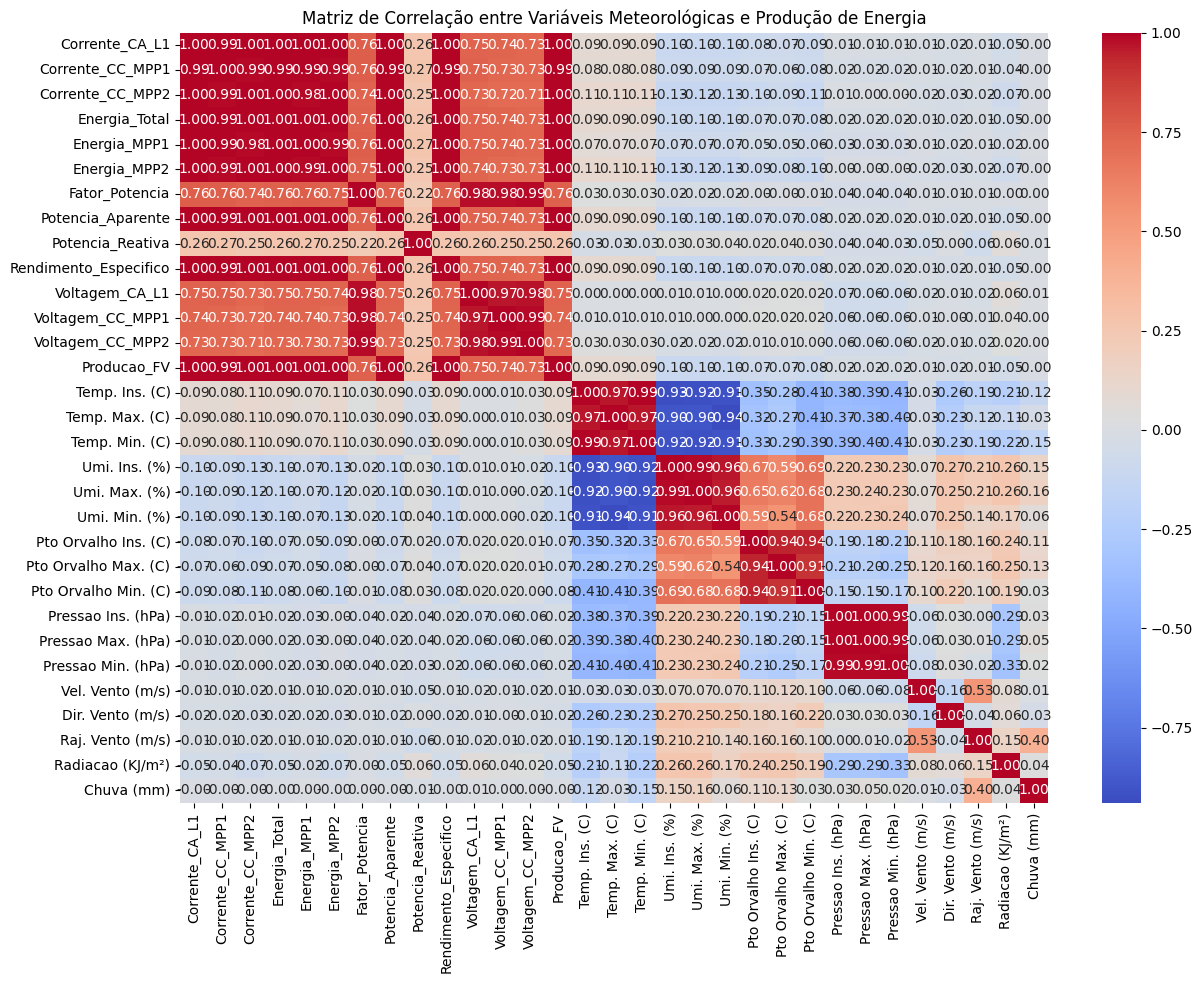

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o conjunto de dados integrado para análise
data = pd.read_csv('combined_solar_meteorological_data.csv')

# Remover colunas não numéricas, como 'Data' e 'Hora (UTC)'
data_numeric = data.select_dtypes(include=[float, int])

# Calcular a matriz de correlação entre todas as variáveis numéricas
correlation_matrix = data_numeric.corr()

# Visualizar a matriz de correlação usando um mapa de calor
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação entre Variáveis Meteorológicas e Produção de Energia")
plt.show()


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Carregar os dados
data = pd.read_csv('combined_solar_meteorological_data.csv')

# Selecionar variáveis independentes e dependente
X = data[['Radiacao (KJ/m²)', 'Temp. Ins. (C)', 'Umi. Ins. (%)']]
y = data['Producao_FV']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de Regressão Linear
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

# Fazer previsões e calcular o erro
y_pred_lr = modelo_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Erro Quadrático Médio (Regressão Linear): {mse_lr}')


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [16]:
# Remover linhas com valores ausentes
data = data.dropna()

# Selecionar variáveis independentes e dependente
X = data[['Radiacao (KJ/m²)', 'Temp. Ins. (C)', 'Umi. Ins. (%)']]
y = data['Producao_FV']

# Continuar com a divisão dos dados e o treinamento do modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Remover todas as linhas com valores ausentes em qualquer coluna
data = data.dropna(how='any')

# Confirmar que não há valores ausentes no DataFrame
print("Valores ausentes após remoção:", data.isnull().sum().sum())

# Continuar com a seleção de variáveis e treinamento
X = data[['Radiacao (KJ/m²)', 'Temp. Ins. (C)', 'Umi. Ins. (%)']]
y = data['Producao_FV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Valores ausentes após remoção: 0


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Treinar o modelo de Regressão Linear
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

# Fazer previsões e calcular o erro
y_pred_lr = modelo_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Erro Quadrático Médio (Regressão Linear): {mse_lr}')


Erro Quadrático Médio (Regressão Linear): 37735.49219721456


In [19]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir a arquitetura da rede neural
modelo_rna = Sequential()
modelo_rna.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
modelo_rna.add(Dense(32, activation='relu'))
modelo_rna.add(Dense(1, activation='linear'))

# Compilar e treinar o modelo
modelo_rna.compile(optimizer='adam', loss='mean_squared_error')
modelo_rna.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=1)

# Fazer previsões e calcular o erro
y_pred_rna = modelo_rna.predict(X_test_scaled).flatten()
mse_rna = mean_squared_error(y_test, y_pred_rna)
print(f'Erro Quadrático Médio (RNA): {mse_rna}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 49373.3828
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 40921.3281
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 37086.5312
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 35771.7070
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 35995.1172
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 35235.5039
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 35780.7500
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 35151.8594
Epoch 9/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 33804.0938
Epoch 10/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 36996.7305
Epoch 11/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 35045.1094
Epoch 12/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 34129.8359
Epoch 13/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 36601.4297
Epoch 14/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Treinar o modelo de Floresta Aleatória
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Fazer previsões e calcular o erro
y_pred_rf = modelo_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Erro Quadrático Médio (Random Forest): {mse_rf}')


Erro Quadrático Médio (Random Forest): 43823.3316474615


In [21]:
# Remover todas as linhas com valores ausentes em qualquer coluna
data = data.dropna(how='any')

# Confirmar que não há valores ausentes no DataFrame
print("Valores ausentes após remoção:", data.isnull().sum().sum())

# Continuar com a seleção de variáveis e treinamento
X = data[['Radiacao (KJ/m²)', 'Temp. Ins. (C)', 'Umi. Ins. (%)']]
y = data['Producao_FV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Valores ausentes após remoção: 0


In [22]:
# Remover todas as linhas com valores ausentes em qualquer coluna
data = data.dropna(how='any')

# Confirmar que não há valores ausentes no DataFrame
print("Valores ausentes após remoção:", data.isnull().sum().sum())

# Continuar com a seleção de variáveis e treinamento
X = data[['Radiacao (KJ/m²)', 'Temp. Ins. (C)', 'Umi. Ins. (%)']]
y = data['Producao_FV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Valores ausentes após remoção: 0


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Treinar o modelo de Regressão Linear
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

# Fazer previsões e calcular o erro
y_pred_lr = modelo_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Erro Quadrático Médio (Regressão Linear): {mse_lr}')


Erro Quadrático Médio (Regressão Linear): 37735.49219721456


In [24]:
from sklearn.ensemble import RandomForestRegressor

# Treinar o modelo de Floresta Aleatória
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Fazer previsões e calcular o erro
y_pred_rf = modelo_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Erro Quadrático Médio (Random Forest): {mse_rf}')


Erro Quadrático Médio (Random Forest): 43823.3316474615


In [25]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir a arquitetura da rede neural
modelo_rna = Sequential()
modelo_rna.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
modelo_rna.add(Dense(32, activation='relu'))
modelo_rna.add(Dense(1, activation='linear'))

# Compilar e treinar o modelo
modelo_rna.compile(optimizer='adam', loss='mean_squared_error')
modelo_rna.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=1)

# Fazer previsões e calcular o erro
y_pred_rna = modelo_rna.predict(X_test_scaled).flatten()
mse_rna = mean_squared_error(y_test, y_pred_rna)
print(f'Erro Quadrático Médio (RNA): {mse_rna}')


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 54192.6758
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 40695.6367
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 36563.3594
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 35444.8398
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 34670.5469
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 36522.4023
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 35696.3164
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 35704.5742
Epoch 9/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 38219.8672
Epoch 10/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 35226.3320
Epoch 11/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 35792.8789
Epoch 12/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 35629.8477
Epoch 13/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 36900.4180
Epoch 14/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 35252.2695

In [26]:
import numpy as np

rmse_lr = np.sqrt(mse_lr)  # Como já calculamos o MSE, usamos a raiz quadrada
print(f'Raiz do Erro Quadrático Médio (RMSE) - Regressão Linear: {rmse_lr}')


Raiz do Erro Quadrático Médio (RMSE) - Regressão Linear: 194.25625394621034


In [27]:
from sklearn.metrics import r2_score

r2_lr = r2_score(y_test, y_pred_lr)
print(f'Coeficiente de Determinação (R²) - Regressão Linear: {r2_lr}')


Coeficiente de Determinação (R²) - Regressão Linear: -0.0075514660196081


In [28]:
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100
print(f'Erro Médio Percentual Absoluto (MAPE) - Regressão Linear: {mape_lr}%')


Erro Médio Percentual Absoluto (MAPE) - Regressão Linear: inf%


In [29]:
y_test_filtered = y_test.replace(0, np.nan)  # Substituir 0 por NaN temporariamente
mape_lr = np.mean(np.abs((y_test_filtered - y_pred_lr) / y_test_filtered)) * 100
print(f'Erro Médio Percentual Absoluto (MAPE) - Regressão Linear: {mape_lr}%')


Erro Médio Percentual Absoluto (MAPE) - Regressão Linear: 1380.5844569051922%


In [30]:
from sklearn.ensemble import RandomForestRegressor

# Treinar o modelo de Floresta Aleatória
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Fazer previsões e calcular o erro
y_pred_rf = modelo_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Erro Quadrático Médio (Random Forest): {mse_rf}')


Erro Quadrático Médio (Random Forest): 43823.3316474615


In [31]:
import pandas as pd

# Carregar o arquivo meteorológico
meteorological_data = pd.read_csv('filtered_data_brt.csv')

# Carregar e concatenar os arquivos de geração solar de 2018 a 2023
solar_files = [
    'Casa_Solar_01012018-31122018.csv', 'Casa_Solar_01012019-31122019.csv',
    'Casa_Solar_01012020-31122020.csv', 'Casa_Solar_01012021-31122021.csv',
    'Casa_Solar_01012022-31122022.csv', 'Casa_Solar_01012023-31122023.csv'
]

solar_data = pd.concat([pd.read_csv(file, low_memory=False) for file in solar_files], ignore_index=True)

# Converter colunas de data/hora para tipo datetime, tratando erros
meteorological_data['DateTime'] = pd.to_datetime(meteorological_data['Data'] + ' ' + meteorological_data['Hora (UTC)'], errors='coerce')
solar_data['DateTime'] = pd.to_datetime(solar_data['Data e horário'], errors='coerce')

# Remover colunas antigas de data/hora
meteorological_data.drop(['Data', 'Hora (UTC)'], axis=1, inplace=True)
solar_data.drop(['Data e horário'], axis=1, inplace=True)

# Remover valores nulos em DateTime antes da mesclagem
solar_data.dropna(subset=['DateTime'], inplace=True)
meteorological_data.dropna(subset=['DateTime'], inplace=True)

# Mesclar os dados com base no DateTime
merged_data = pd.merge_asof(
    solar_data.sort_values('DateTime'),
    meteorological_data.sort_values('DateTime'),
    on='DateTime',
    direction='nearest'
)

# Remover valores ausentes resultantes, se necessário
merged_data = merged_data.dropna()

# Exibir as primeiras linhas do conjunto de dados mesclado
print(merged_data.head())

# Salvar o conjunto de dados mesclado, se desejar
merged_data.to_csv('dados_mesclados.csv', index=False)


<ipython-input-31-9bceaee97817>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  solar_data['DateTime'] = pd.to_datetime(solar_data['Data e horário'], errors='coerce')


    Corrente CA L1 | Primo 8.2-1 (1) Corrente CC MPP1 | Primo 8.2-1 (1)  \
101                           14.540                              3.240   
102                          15.6683                             3.5306   
103                           9.4817                             2.1303   
104                            9.740                              2.170   
105                          13.2259                             2.9071   

    Corrente CC MPP2 | Primo 8.2-1 (1) Energia | Primo 8.2-1 (1)  \
101                              3.180                 281.11617   
102                             3.4308                 302.86285   
103                             2.0703                 182.12656   
104                              2.120                 186.07864   
105                             2.9365                 254.20883   

    Energia MPP1 | Primo 8.2-1 (1) Energia MPP2 | Primo 8.2-1 (1)  \
101                         140.81                         140.31   
10

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Carregar os dados mesclados
data = pd.read_csv('dados_mesclados.csv')

# Definir variáveis preditivas (features) e alvo (target)
X = data[['Radiacao (KJ/m²)', 'Temp. Ins. (C)', 'Umi. Ins. (%)', 'Vel. Vento (m/s)', 'Pressao Ins. (hPa)']]
y = data['Energia | Primo 8.2-1 (1)']  # Ajuste com o nome da coluna de geração solar

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Regressão Linear
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)
y_pred_lr = modelo_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Regressão Linear - MSE: {mse_lr}, R²: {r2_lr}')

# 2. Floresta Aleatória
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Floresta Aleatória - MSE: {mse_rf}, R²: {r2_rf}')

# 3. Rede Neural Artificial (MLP Regressor)
modelo_mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
modelo_mlp.fit(X_train, y_train)
y_pred_mlp = modelo_mlp.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
print(f'Rede Neural (MLP) - MSE: {mse_mlp}, R²: {r2_mlp}')

# Comparação de Resultados
print("\nComparação de Desempenho:")
print(f"Regressão Linear - MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")
print(f"Floresta Aleatória - MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")
print(f"Rede Neural (MLP) - MSE: {mse_mlp:.2f}, R²: {r2_mlp:.2f}")


Regressão Linear - MSE: 33253.26897100045, R²: 0.1698248587164093
Floresta Aleatória - MSE: 21964.6954634941, R²: 0.45164656817471804
Rede Neural (MLP) - MSE: 30251.99148721515, R²: 0.24475240828471145

Comparação de Desempenho:
Regressão Linear - MSE: 33253.27, R²: 0.17
Floresta Aleatória - MSE: 21964.70, R²: 0.45
Rede Neural (MLP) - MSE: 30251.99, R²: 0.24


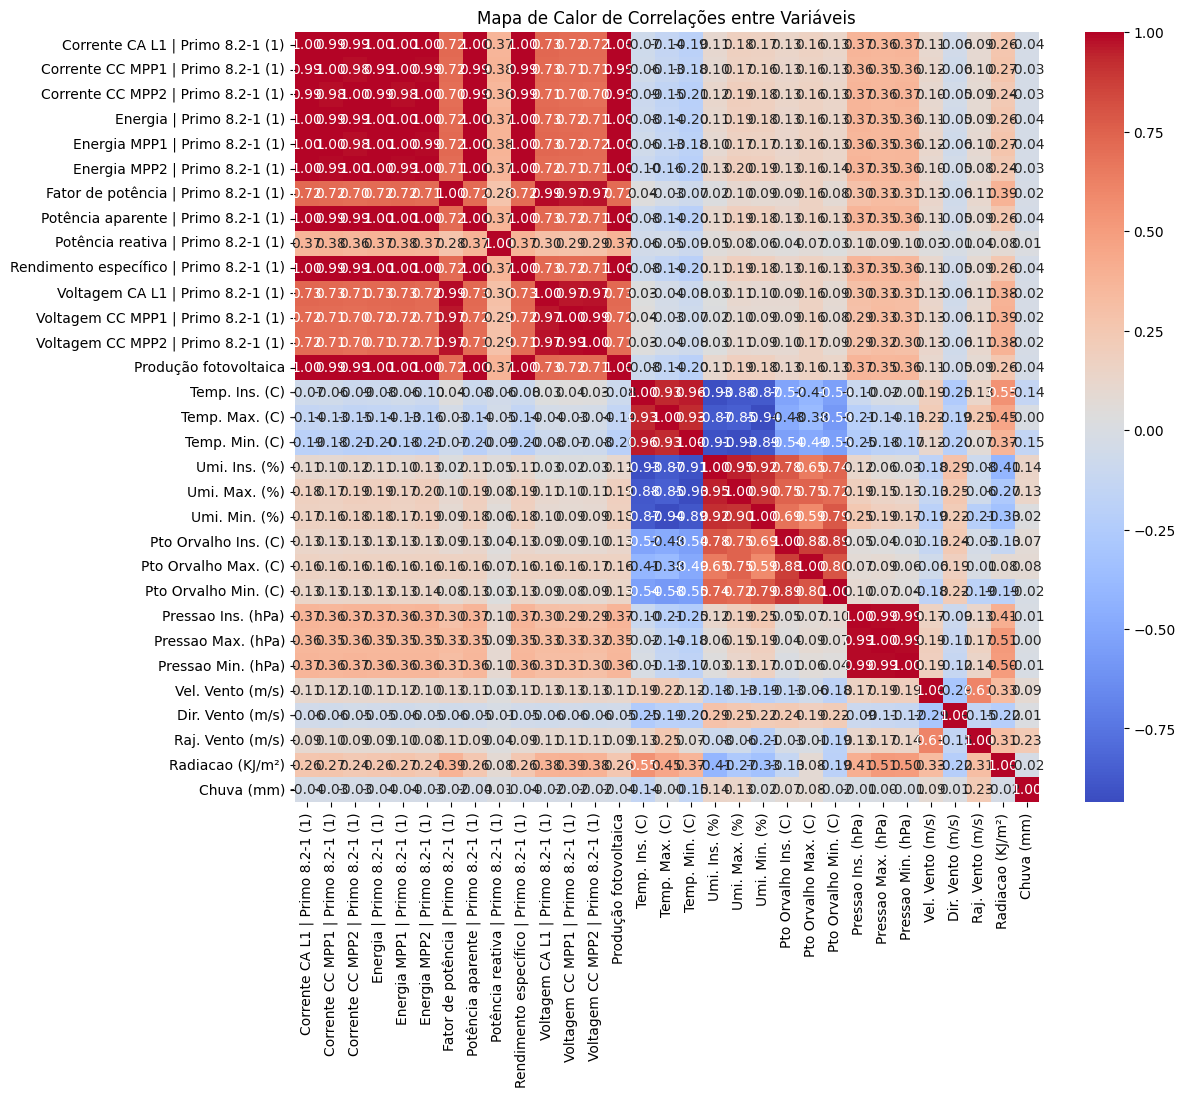

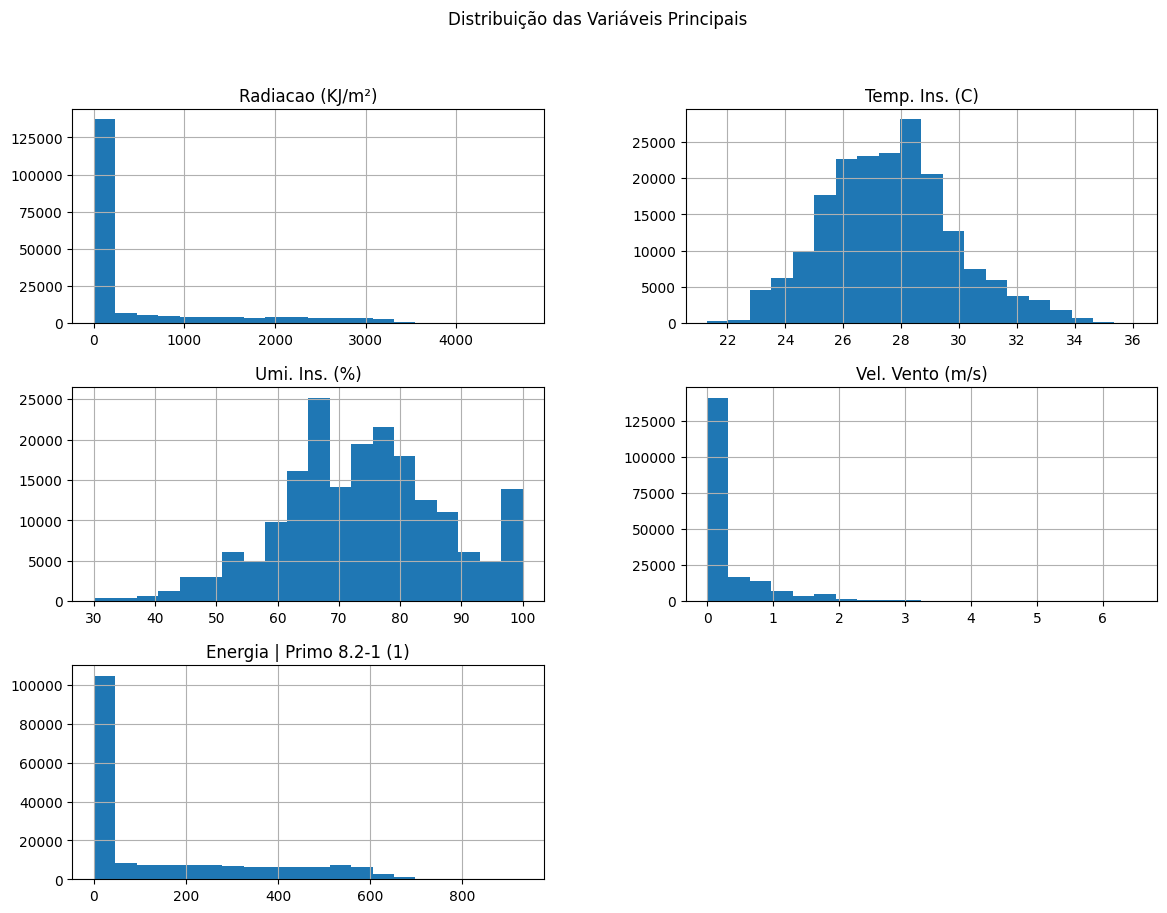

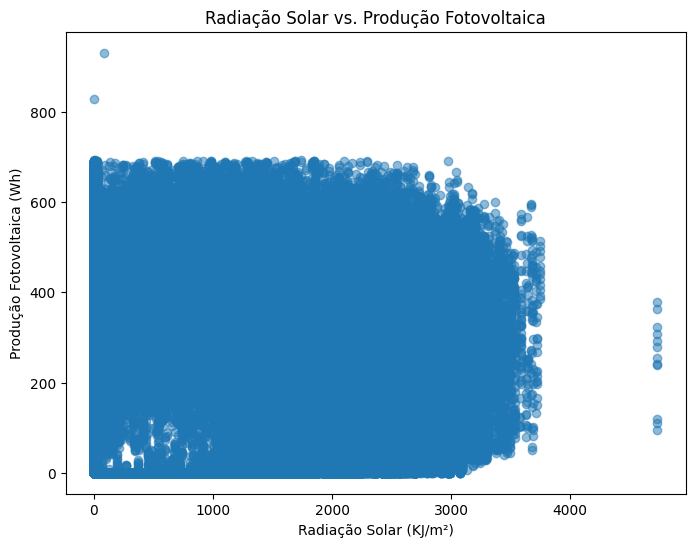

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o conjunto de dados mesclado
data = pd.read_csv('dados_mesclados.csv')

# Selecionar apenas as colunas numéricas para o cálculo de correlação
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# 1. Mapa de Calor para Correlações
plt.figure(figsize=(12, 10))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlações entre Variáveis")
plt.show()

# 2. Histogramas para verificar a distribuição das variáveis principais
variables_to_plot = ['Radiacao (KJ/m²)', 'Temp. Ins. (C)', 'Umi. Ins. (%)', 'Vel. Vento (m/s)', 'Energia | Primo 8.2-1 (1)']
data[variables_to_plot].hist(bins=20, figsize=(14, 10), layout=(3, 2))
plt.suptitle("Distribuição das Variáveis Principais")
plt.show()

# 3. Gráfico de Dispersão para verificar a relação entre Radiação e Produção de Energia Solar
plt.figure(figsize=(8, 6))
plt.scatter(data['Radiacao (KJ/m²)'], data['Energia | Primo 8.2-1 (1)'], alpha=0.5)
plt.xlabel('Radiação Solar (KJ/m²)')
plt.ylabel('Produção Fotovoltaica (Wh)')
plt.title('Radiação Solar vs. Produção Fotovoltaica')
plt.show()


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Carregar os dados meteorológicos
data = pd.read_csv('dados_mesclados.csv')

# Engenharia de atributos: extrair características temporais de 'DateTime'
data['DateTime'] = pd.to_datetime(data['DateTime'])
data['Month'] = data['DateTime'].dt.month
data['DayOfYear'] = data['DateTime'].dt.dayofyear

# Selecionar variáveis preditivas meteorológicas
X = data[['Radiacao (KJ/m²)', 'Temp. Ins. (C)', 'Umi. Ins. (%)', 'Vel. Vento (m/s)', 'Pressao Ins. (hPa)', 'Month', 'DayOfYear']]
y = data['Energia | Primo 8.2-1 (1)']  # Coluna alvo de geração solar

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Modelo com Random Forest
modelo_rf = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest - MSE: {mse_rf}, R²: {r2_rf}')

# 2. Modelo com XGBoost
modelo_xgb = XGBRegressor(n_estimators=200, max_depth=10, learning_rate=0.1, random_state=42)
modelo_xgb.fit(X_train, y_train)
y_pred_xgb = modelo_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost - MSE: {mse_xgb}, R²: {r2_xgb}')

# Comparação de Resultados
print("\nComparação de Desempenho:")
print(f"Random Forest - MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")
print(f"XGBoost - MSE: {mse_xgb:.2f}, R²: {r2_xgb:.2f}")


Random Forest - MSE: 22280.07655825789, R²: 0.4437730100853755
XGBoost - MSE: 21711.02312508418, R²: 0.4579795536494047

Comparação de Desempenho:
Random Forest - MSE: 22280.08, R²: 0.44
XGBoost - MSE: 21711.02, R²: 0.46


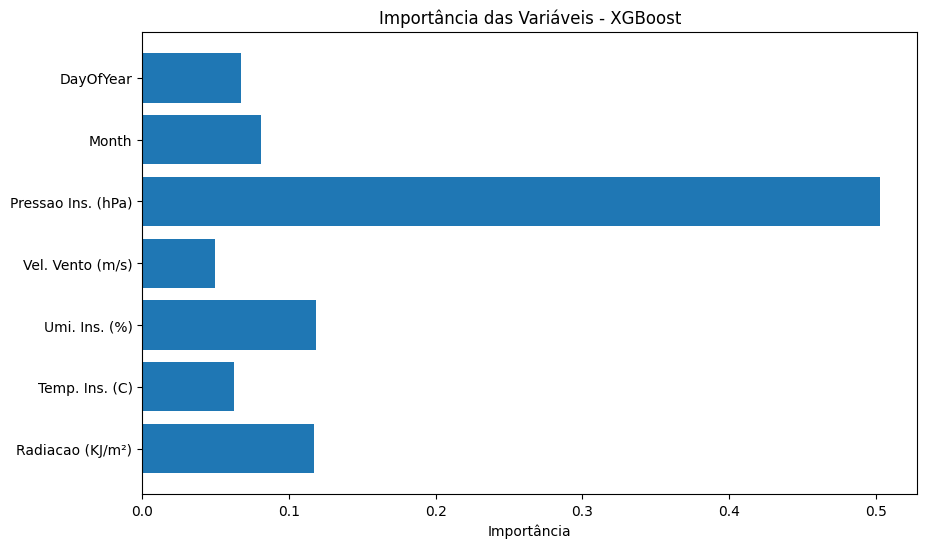

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Melhor Modelo XGBoost após Busca em Grade - MSE: 21676.357614379704, R²: 0.45884498571480115


In [35]:
from sklearn.model_selection import GridSearchCV

# Análise da Importância das Variáveis no XGBoost
import matplotlib.pyplot as plt
importances = modelo_xgb.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances)
plt.xlabel("Importância")
plt.title("Importância das Variáveis - XGBoost")
plt.show()

# Busca em Grade para Ajuste Fino de Hiperparâmetros do XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=XGBRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_mean_squared_error',
                           verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Melhor modelo após a busca em grade
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print(f"Melhor Modelo XGBoost após Busca em Grade - MSE: {mse_best}, R²: {r2_best}")


In [36]:
print(data.columns)


Index(['Corrente CA L1 | Primo 8.2-1 (1)',
       'Corrente CC MPP1 | Primo 8.2-1 (1)',
       'Corrente CC MPP2 | Primo 8.2-1 (1)', 'Energia | Primo 8.2-1 (1)',
       'Energia MPP1 | Primo 8.2-1 (1)', 'Energia MPP2 | Primo 8.2-1 (1)',
       'Fator de potência | Primo 8.2-1 (1)',
       'Potência aparente | Primo 8.2-1 (1)',
       'Potência reativa | Primo 8.2-1 (1)',
       'Rendimento específico | Primo 8.2-1 (1)',
       'Voltagem CA L1 | Primo 8.2-1 (1)',
       'Voltagem CC MPP1 | Primo 8.2-1 (1)',
       'Voltagem CC MPP2 | Primo 8.2-1 (1)', 'Produção fotovoltaica',
       'DateTime', 'Temp. Ins. (C)', 'Temp. Max. (C)', 'Temp. Min. (C)',
       'Umi. Ins. (%)', 'Umi. Max. (%)', 'Umi. Min. (%)',
       'Pto Orvalho Ins. (C)', 'Pto Orvalho Max. (C)', 'Pto Orvalho Min. (C)',
       'Pressao Ins. (hPa)', 'Pressao Max. (hPa)', 'Pressao Min. (hPa)',
       'Vel. Vento (m/s)', 'Dir. Vento (m/s)', 'Raj. Vento (m/s)',
       'Radiacao (KJ/m²)', 'Chuva (mm)', 'Month', 'DayOfYear'],
    

In [37]:
# Certifique-se de que 'DateTime' está no formato datetime
data['DateTime'] = pd.to_datetime(data['DateTime'], errors='coerce')

# Adicionar colunas de 'Month' e 'DayOfYear' para capturar a sazonalidade
data['Month'] = data['DateTime'].dt.month
data['DayOfYear'] = data['DateTime'].dt.dayofyear

# Confirmar que as colunas foram adicionadas
print(data[['DateTime', 'Month', 'DayOfYear']].head())


             DateTime  Month  DayOfYear
0 2018-01-01 09:35:00      1          1
1 2018-01-01 09:40:00      1          1
2 2018-01-01 09:45:00      1          1
3 2018-01-01 09:50:00      1          1
4 2018-01-01 09:55:00      1          1



Analisando o parâmetro: Corrente CA L1 | Primo 8.2-1 (1)


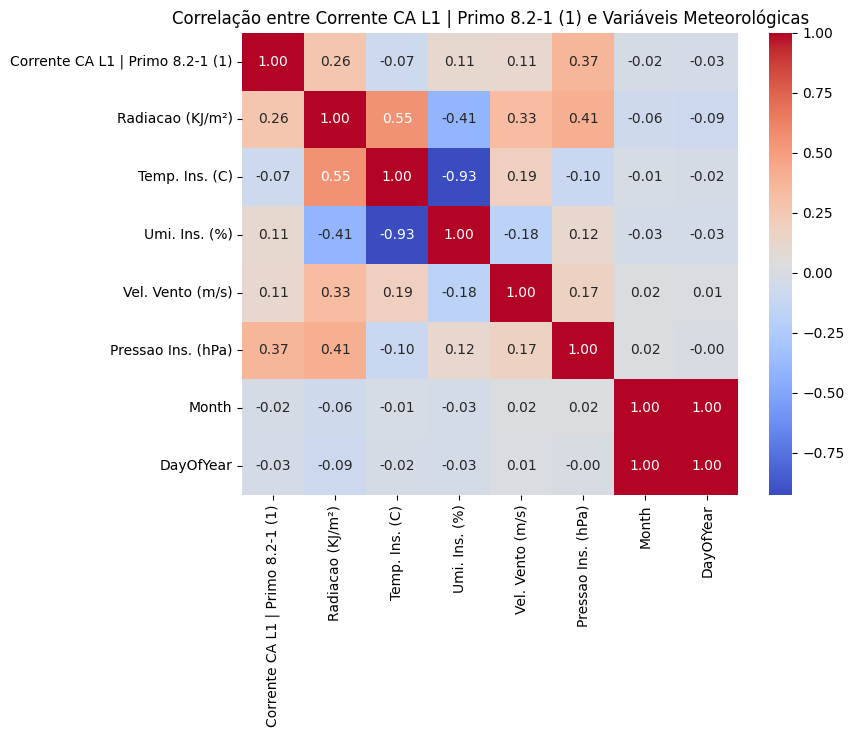

Random Forest - Corrente CA L1 | Primo 8.2-1 (1) - MSE: 63.16, R²: 0.46
XGBoost - Corrente CA L1 | Primo 8.2-1 (1) - MSE: 67.58, R²: 0.43


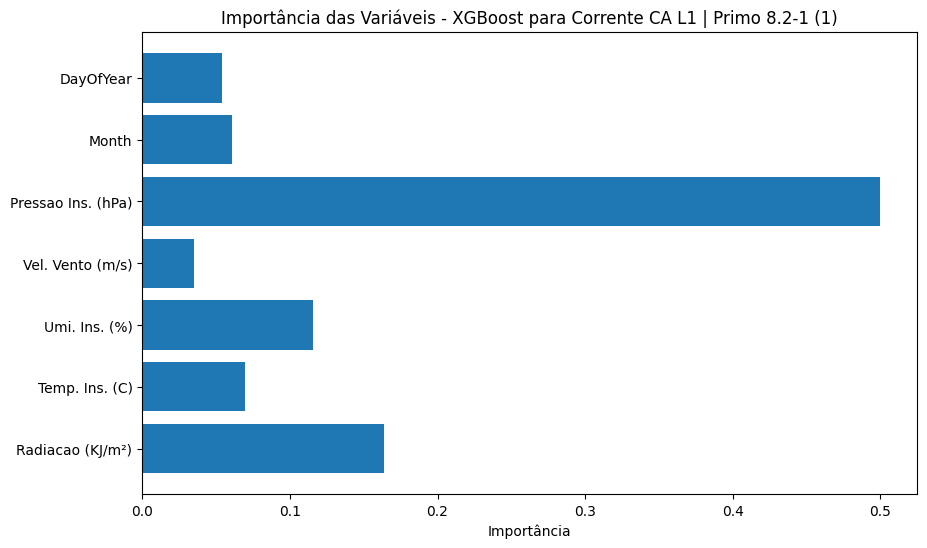


Analisando o parâmetro: Corrente CC MPP1 | Primo 8.2-1 (1)


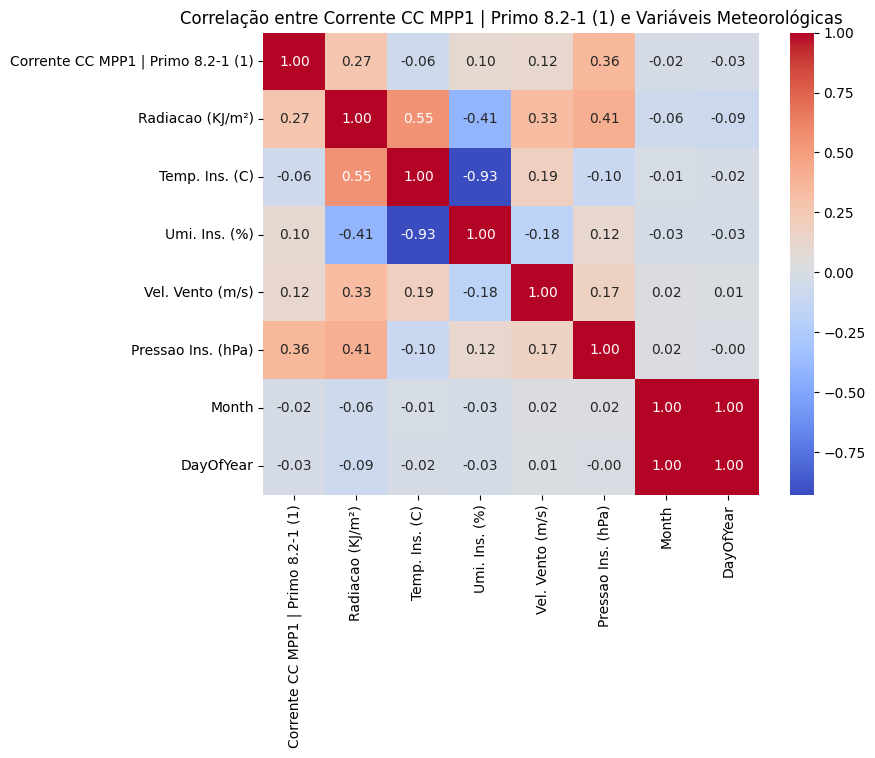

Random Forest - Corrente CC MPP1 | Primo 8.2-1 (1) - MSE: 2.91, R²: 0.46
XGBoost - Corrente CC MPP1 | Primo 8.2-1 (1) - MSE: 3.09, R²: 0.43


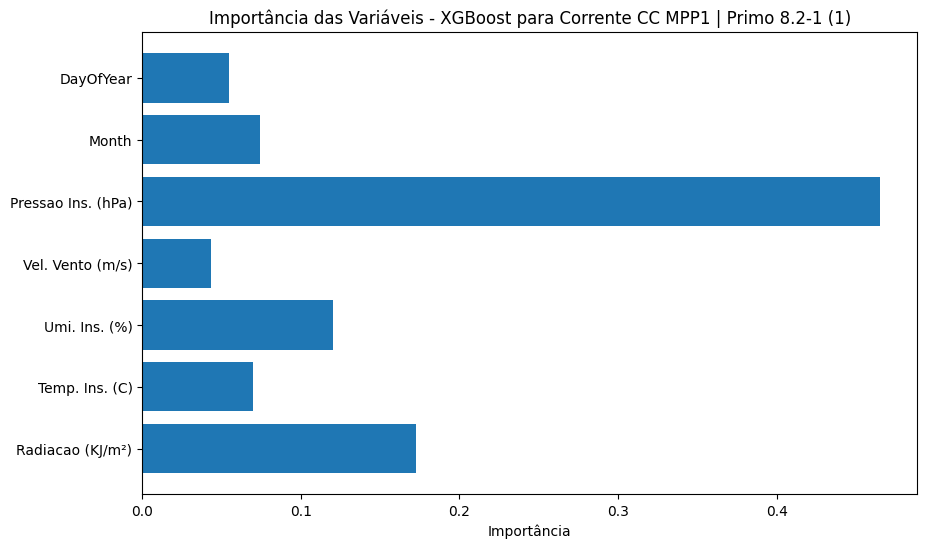


Analisando o parâmetro: Energia | Primo 8.2-1 (1)


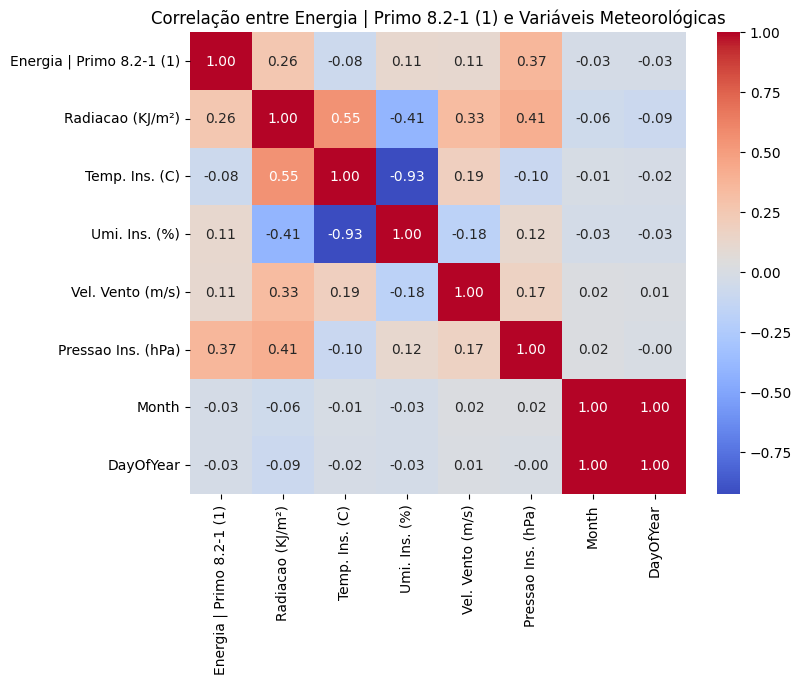

Random Forest - Energia | Primo 8.2-1 (1) - MSE: 21641.76, R²: 0.46
XGBoost - Energia | Primo 8.2-1 (1) - MSE: 23078.43, R²: 0.42


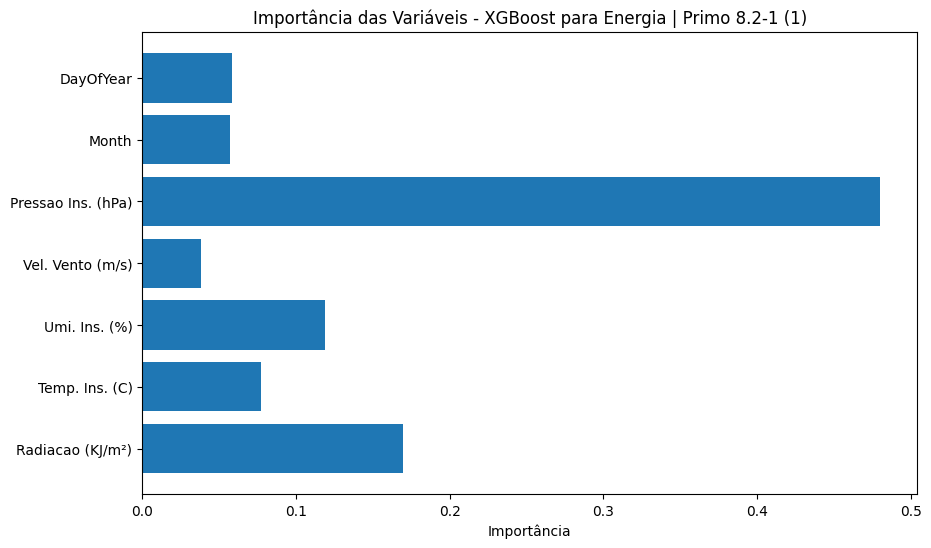


Analisando o parâmetro: Potência aparente | Primo 8.2-1 (1)


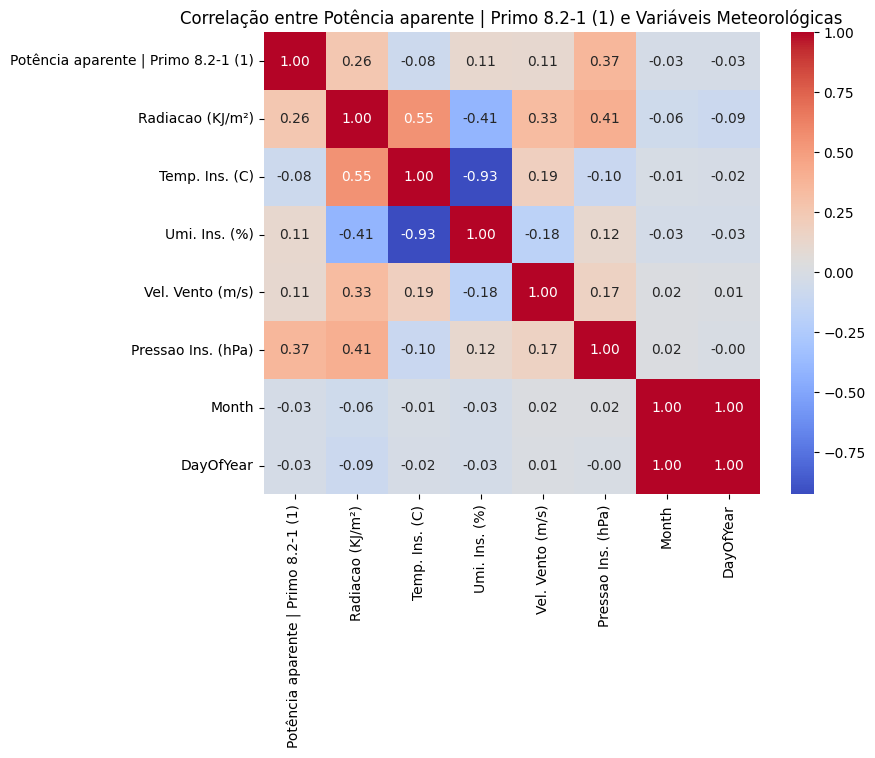

Random Forest - Potência aparente | Primo 8.2-1 (1) - MSE: 3123713.24, R²: 0.46
XGBoost - Potência aparente | Primo 8.2-1 (1) - MSE: 3323493.24, R²: 0.43


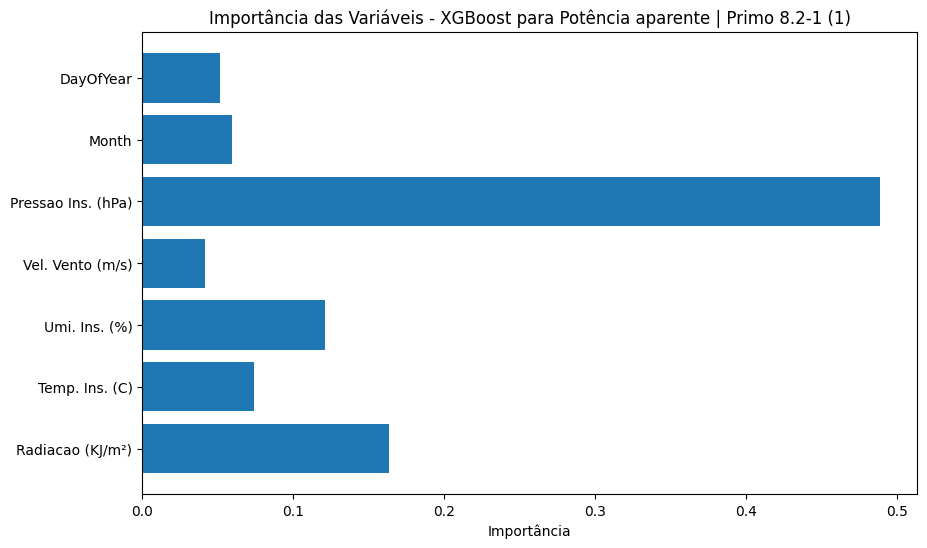


Analisando o parâmetro: Potência reativa | Primo 8.2-1 (1)


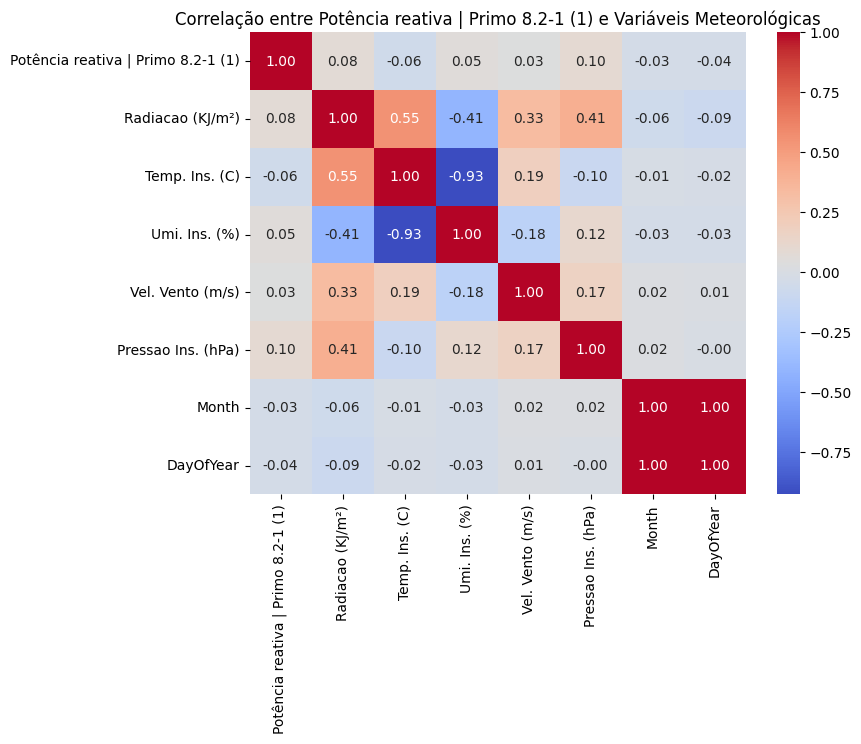

Random Forest - Potência reativa | Primo 8.2-1 (1) - MSE: 135.00, R²: 0.71
XGBoost - Potência reativa | Primo 8.2-1 (1) - MSE: 163.47, R²: 0.65


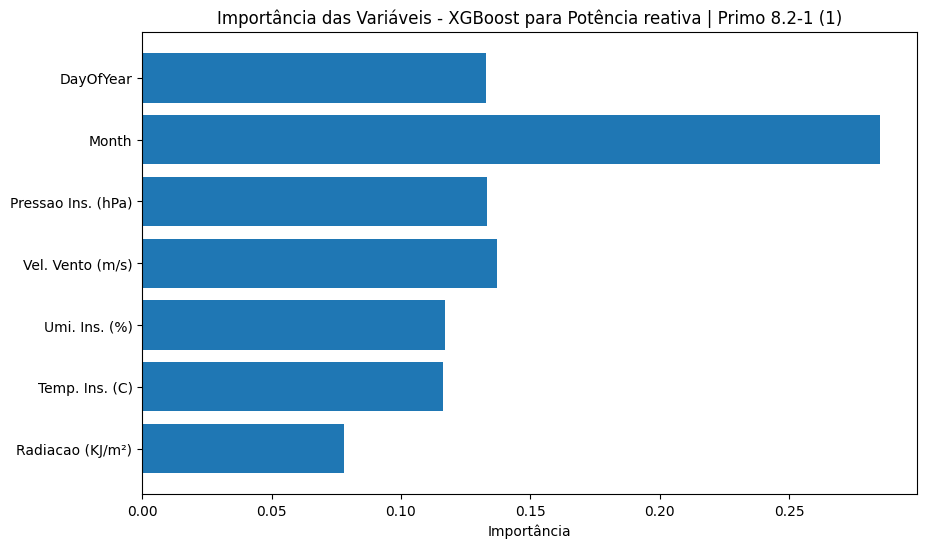


Analisando o parâmetro: Rendimento específico | Primo 8.2-1 (1)


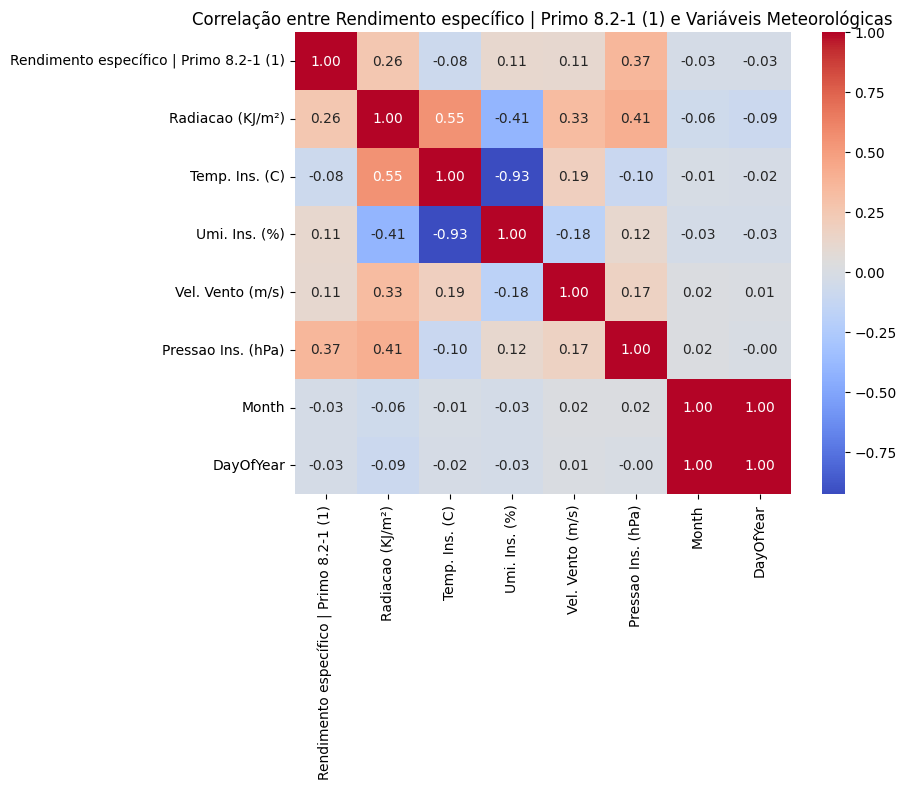

Random Forest - Rendimento específico | Primo 8.2-1 (1) - MSE: 0.00, R²: 0.46
XGBoost - Rendimento específico | Primo 8.2-1 (1) - MSE: 0.00, R²: 0.42


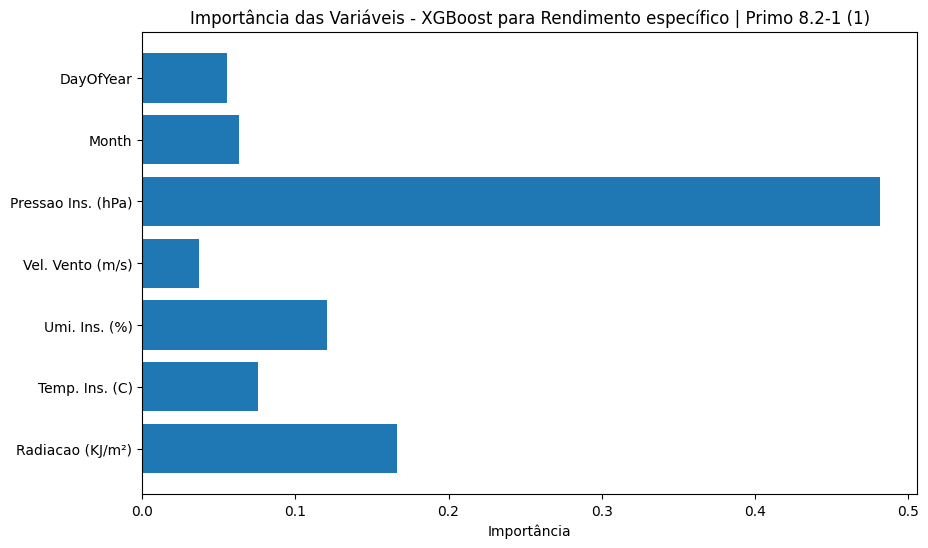


Parâmetro: Corrente CA L1 | Primo 8.2-1 (1)
Random Forest - MSE: 63.16, R²: 0.46
XGBoost - MSE: 67.58, R²: 0.43

Parâmetro: Corrente CC MPP1 | Primo 8.2-1 (1)
Random Forest - MSE: 2.91, R²: 0.46
XGBoost - MSE: 3.09, R²: 0.43

Parâmetro: Energia | Primo 8.2-1 (1)
Random Forest - MSE: 21641.76, R²: 0.46
XGBoost - MSE: 23078.43, R²: 0.42

Parâmetro: Potência aparente | Primo 8.2-1 (1)
Random Forest - MSE: 3123713.24, R²: 0.46
XGBoost - MSE: 3323493.24, R²: 0.43

Parâmetro: Potência reativa | Primo 8.2-1 (1)
Random Forest - MSE: 135.00, R²: 0.71
XGBoost - MSE: 163.47, R²: 0.65

Parâmetro: Rendimento específico | Primo 8.2-1 (1)
Random Forest - MSE: 0.00, R²: 0.46
XGBoost - MSE: 0.00, R²: 0.42


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Definir as variáveis meteorológicas como variáveis de entrada (features)
X = data[['Radiacao (KJ/m²)', 'Temp. Ins. (C)', 'Umi. Ins. (%)', 'Vel. Vento (m/s)', 'Pressao Ins. (hPa)', 'Month', 'DayOfYear']]

# Lista dos parâmetros do inversor para modelagem individual
parameters = ['Corrente CA L1 | Primo 8.2-1 (1)', 'Corrente CC MPP1 | Primo 8.2-1 (1)',
              'Energia | Primo 8.2-1 (1)', 'Potência aparente | Primo 8.2-1 (1)',
              'Potência reativa | Primo 8.2-1 (1)', 'Rendimento específico | Primo 8.2-1 (1)']

results = {}

# Para cada parâmetro do inversor, realizar análise de correlação e modelagem
for param in parameters:
    print(f"\nAnalisando o parâmetro: {param}")

    # 1. Análise de Correlação
    plt.figure(figsize=(8, 6))
    sns.heatmap(data[[param] + X.columns.tolist()].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlação entre {param} e Variáveis Meteorológicas")
    plt.show()

    # 2. Modelagem com Random Forest
    y = data[param].dropna()  # Excluir valores nulos
    X_clean = X.loc[y.index]  # Selecionar apenas as linhas sem valores nulos em y
    X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)

    model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
    model_rf.fit(X_train, y_train)
    y_pred_rf = model_rf.predict(X_test)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)
    print(f'Random Forest - {param} - MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}')

    # 3. Modelagem com XGBoost
    model_xgb = XGBRegressor(n_estimators=100, random_state=42)
    model_xgb.fit(X_train, y_train)
    y_pred_xgb = model_xgb.predict(X_test)
    mse_xgb = mean_squared_error(y_test, y_pred_xgb)
    r2_xgb = r2_score(y_test, y_pred_xgb)
    print(f'XGBoost - {param} - MSE: {mse_xgb:.2f}, R²: {r2_xgb:.2f}')

    # 4. Análise da Importância das Variáveis para o modelo XGBoost
    importances = model_xgb.feature_importances_
    plt.figure(figsize=(10, 6))
    plt.barh(X.columns, importances)
    plt.xlabel("Importância")
    plt.title(f"Importância das Variáveis - XGBoost para {param}")
    plt.show()

    # Guardar os resultados
    results[param] = {
        'Random Forest': {'MSE': mse_rf, 'R²': r2_rf},
        'XGBoost': {'MSE': mse_xgb, 'R²': r2_xgb}
    }

# Exibir os resultados resumidos
for param, metrics in results.items():
    print(f"\nParâmetro: {param}")
    for model_name, metrics_values in metrics.items():
        print(f"{model_name} - MSE: {metrics_values['MSE']:.2f}, R²: {metrics_values['R²']:.2f}")


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Adicionar a coluna HourOfDay
data['HourOfDay'] = data['DateTime'].dt.hour

# Variáveis de entrada
X = data[['Radiacao (KJ/m²)', 'Temp. Ins. (C)', 'Umi. Ins. (%)', 'Vel. Vento (m/s)',
          'Pressao Ins. (hPa)', 'Month', 'DayOfYear', 'HourOfDay']]

# Lista dos parâmetros do inversor
parameter = 'Produção fotovoltaica'  # Substitua pelo parâmetro de interesse

# Variável de saída
y = data[parameter].dropna()
X_clean = X.loc[y.index]

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)

# Definir a grade de parâmetros para ajuste
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

# Instanciar o modelo e realizar o ajuste de hiperparâmetros
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_rf = grid_search.best_estimator_

# Fazer previsões e avaliar o modelo otimizado
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Melhor Modelo Random Forest - MSE: {mse:.2f}, R²: {r2:.2f}")
print("Melhores hiperparâmetros:", grid_search.best_params_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   6.6s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   6.4s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   6.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  12.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  12.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  12.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  25.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  25.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  26.0s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   6.5s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   6.5s
[CV] END .max_depth=10, min_samples_split=5, n_

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Instanciar e avaliar o modelo
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)
y_pred_lr = modelo_lr.predict(X_test)

# Calcular métricas
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Regressão Linear - MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")


NameError: name 'X_train' is not defined

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import StandardScaler
import numpy as np

# Função para avaliar o modelo
def avaliar_modelo(modelo, X_train, X_test, y_train, y_test):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Lista de modelos a serem testados
modelos = {
    "Regressão Linear": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf')
}

# Avaliar todos os modelos e exibir resultados
resultados = {}
for nome, modelo in modelos.items():
    mse, r2 = avaliar_modelo(modelo, X_train, X_test, y_train, y_test)
    resultados[nome] = {"MSE": mse, "R²": r2}
    print(f"{nome} - MSE: {mse:.2f}, R²: {r2:.2f}")


Regressão Linear - MSE: 32203.91, R²: 0.20
Random Forest - MSE: 4082.05, R²: 0.90
XGBoost - MSE: 5629.37, R²: 0.86


In [ ]:
# Engenharia de Atributos
data['DateTime'] = pd.to_datetime(data['DateTime'])
data['Month'] = data['DateTime'].dt.month
data['DayOfYear'] = data['DateTime'].dt.dayofyear

# Transformações de variáveis
data['Log_Radiacao'] = np.log1p(data['Radiacao (KJ/m²)'])


In [ ]:
# Escalonar os dados para LSTM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Transformar os dados para uma estrutura adequada ao LSTM
X_train_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
y_train_lstm = y_scaled


In [ ]:
# Construir o modelo LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Treinar o modelo
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, validation_split=0.2)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Configurações do modelo LSTM
time_steps = 10  # Número de passos temporais anteriores
num_features = X.shape[1]  # Número de características em X

# Função para criar sequências temporais para LSTM
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)].values)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Transformar X e y para sequências LSTM
X_train_lstm, y_train_lstm = create_sequences(X_train, y_train, time_steps)
X_test_lstm, y_test_lstm = create_sequences(X_test, y_test, time_steps)

# Verificar as novas formas para garantir que são compatíveis com o LSTM
print(f'Formato de X_train_lstm: {X_train_lstm.shape}, y_train_lstm: {y_train_lstm.shape}')
print(f'Formato de X_test_lstm: {X_test_lstm.shape}, y_test_lstm: {y_test_lstm.shape}')

# Construir o modelo LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Treinar o modelo
history = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Fazer previsões no conjunto de teste
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Calcular métricas de desempenho
mse_lstm = mean_squared_error(y_test_lstm, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test_lstm, y_pred_lstm)

# Exibir os resultados
print(f'Erro Quadrático Médio (MSE) - LSTM: {mse_lstm:.2f}')
print(f'Raiz do Erro Quadrático Médio (RMSE) - LSTM: {rmse_lstm:.2f}')
print(f'Coeficiente de Determinação (R²) - LSTM: {r2_lstm:.2f}')

# Opcional: Visualizar o histórico de treinamento
import matplotlib.pyplot as plt

# Plotar o erro de treino e validação ao longo das épocas
plt.plot(history.history['loss'], label='Erro de Treino')
plt.plot(history.history['val_loss'], label='Erro de Validação')
plt.xlabel('Épocas')
plt.ylabel('Erro Quadrático Médio (MSE)')
plt.title('Evolução do Erro durante o Treinamento')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, mean_squared_error

# Definir a métrica para a validação cruzada
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 1. Regressão Linear
modelo_lr = LinearRegression()
scores_lr = cross_val_score(modelo_lr, X, y, cv=5, scoring=mse_scorer)
print(f"Regressão Linear - Média MSE após validação cruzada: {-np.mean(scores_lr):.2f}")

# 2. Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores_rf = cross_val_score(modelo_rf, X, y, cv=5, scoring=mse_scorer)
print(f"Random Forest - Média MSE após validação cruzada: {-np.mean(scores_rf):.2f}")

# 3. XGBoost
modelo_xgb = XGBRegressor(n_estimators=100, random_state=42)
scores_xgb = cross_val_score(modelo_xgb, X, y, cv=5, scoring=mse_scorer)
print(f"XGBoost - Média MSE após validação cruzada: {-np.mean(scores_xgb):.2f}")

# 4. Support Vector Regressor (SVR)
modelo_svr = SVR(kernel='rbf')
scores_svr = cross_val_score(modelo_svr, X, y, cv=5, scoring=mse_scorer)
print(f"SVR - Média MSE após validação cruzada: {-np.mean(scores_svr):.2f}")

# Para o modelo LSTM, a validação cruzada é mais complexa de implementar diretamente e normalmente não é aplicada
# devido ao custo computacional e à natureza do modelo. Em vez disso, usaremos a divisão padrão treino-teste.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Importância das variáveis para o XGBoost
importances_xgb = modelos["XGBoost"].feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances_xgb)
plt.xlabel("Importância")
plt.title("Importância das Variáveis - XGBoost")
plt.show()

# 2. Importância das variáveis para o Random Forest
importances_rf = modelos["Random Forest"].feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances_rf)
plt.xlabel("Importância")
plt.title("Importância das Variáveis - Random Forest")
plt.show()

# 3. Análise para SVR (usando o coeficiente absoluto dos dados normalizados, caso SVR seja linear)
# Neste caso, SVR com kernel linear poderia ter coeficientes. Caso não seja linear, não terá importância direta
if hasattr(modelos["SVR"], 'coef_'):
    importances_svr = np.abs(modelos["SVR"].coef_.flatten())
    plt.figure(figsize=(10, 6))
    plt.barh(X.columns, importances_svr)
    plt.xlabel("Importância")
    plt.title("Importância das Variáveis - SVR (Linear)")
    plt.show()
else:
    print("SVR com kernel não linear não fornece importâncias diretas de variáveis.")

# 4. Análise indireta para o modelo LSTM
# Uma maneira indireta de avaliar a importância das variáveis é verificar o impacto das previsões removendo ou variando as entradas
# Isso normalmente envolve testes de perturbação ou redução de variáveis para avaliar o efeito sobre o erro
def feature_importance_lstm(X_test, model, base_rmse):
    # Calcula a importância da variável removendo uma de cada vez e verificando o aumento no RMSE
    importances = []
    for i, col in enumerate(X.columns):
        X_test_modified = X_test.copy()
        X_test_modified[:, i] = 0  # Remover o efeito desta coluna
        y_pred_modified = model.predict(X_test_modified)
        rmse_modified = np.sqrt(mean_squared_error(y_test, y_pred_modified))
        importances.append(base_rmse - rmse_modified)

    # Visualizar importâncias
    plt.figure(figsize=(10, 6))
    plt.barh(X.columns, importances)
    plt.xlabel("Importância (Diferença de RMSE)")
    plt.title("Importância das Variáveis - LSTM (Perturbação)")
    plt.show()

# Supondo que LSTM foi treinado e y_pred_lstm está disponível
base_rmse_lstm = np.sqrt(mean_squared_error(y_test_lstm, y_pred_lstm))
feature_importance_lstm(X_test_lstm, modelos["LSTM"], base_rmse_lstm)


In [ ]:
# Importando o XGBRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Treinando o modelo final com os melhores parâmetros
best_xgb_model = XGBRegressor(
    learning_rate=0.2,
    max_depth=10,
    n_estimators=200,
    subsample=1.0,
    random_state=42
)

# Ajustar o modelo aos dados de treinamento
best_xgb_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = best_xgb_model.predict(X_test)

# Avaliar o modelo usando MSE e R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Desempenho do modelo otimizado XGBoost:")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Previsões no conjunto de teste com o modelo Random Forest treinado
y_pred_rf = model_rf.predict(X_test)

# Cálculo dos resíduos (erro de previsão)
residuals = y_test - y_pred_rf

# Plotando o gráfico de resíduos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Previsão")
plt.ylabel("Resíduo (Erro)")
plt.title("Análise Residual do Modelo Random Forest")
plt.show()

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Resíduo (Erro)")
plt.title("Distribuição dos Resíduos (Random Forest)")
plt.show()


In [ ]:
# Definindo um limite de radiação solar para considerar um dia "ensolarado" ou "nublado"
# Ajuste o valor conforme necessário, por exemplo, dias com radiação > 150 KJ/m² como ensolarados
sunny_threshold = 150

# Separando o conjunto de teste em dias ensolarados e nublados
sunny_days = X_test[X_test['Radiacao (KJ/m²)'] > sunny_threshold]
cloudy_days = X_test[X_test['Radiacao (KJ/m²)'] <= sunny_threshold]

# Calculando as previsões e os erros para cada grupo
y_test_sunny = y_test.loc[sunny_days.index]
y_test_cloudy = y_test.loc[cloudy_days.index]

y_pred_sunny = model_rf.predict(sunny_days)
y_pred_cloudy = model_rf.predict(cloudy_days)

# Calculando métricas para dias ensolarados
mse_sunny = mean_squared_error(y_test_sunny, y_pred_sunny)
r2_sunny = r2_score(y_test_sunny, y_pred_sunny)
print(f"Desempenho em Dias Ensolarados - MSE: {mse_sunny:.2f}, R²: {r2_sunny:.2f}")

# Calculando métricas para dias nublados
mse_cloudy = mean_squared_error(y_test_cloudy, y_pred_cloudy)
r2_cloudy = r2_score(y_test_cloudy, y_pred_cloudy)
print(f"Desempenho em Dias Nublados - MSE: {mse_cloudy:.2f}, R²: {r2_cloudy:.2f}")
